# Trans-Effects

## Install necessary Packages

In [1]:
!pip install cptac
!pip install --upgrade cptac

Requirement already up-to-date: cptac in c:\users\chels\anaconda3\lib\site-packages (0.8.1)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cptac
import pyensembl
from scipy import stats

## Download all the data

In [3]:
cptac.download(dataset="luad")
cptac.download(dataset="hnscc")
cptac.download(dataset="ovarian")
cptac.download(dataset="colon")
cptac.download(dataset="brca")
cptac.download(dataset="lscc")

True

In [4]:
luad = cptac.Luad()
hnscc = cptac.Hnscc()
ovarian = cptac.Ovarian()
colon = cptac.Colon()
brca = cptac.Brca()
lscc = cptac.Lscc()

cptac warning: The LUAD dataset is under publication embargo until July 01, 2020. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (C:\Users\chels\anaconda3\lib\site-packages\ipykernel_launcher.py, line 1)


cptac warning: The HNSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (C:\Users\chels\anaconda3\lib\site-packages\ipykernel_launcher.py, line 2)


INFO:numexpr.utils:NumExpr defaulting to 8 threads.


version 3scc v3.2.......                  


cptac warning: The LSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (C:\Users\chels\anaconda3\lib\site-packages\ipykernel_launcher.py, line 6)


In [5]:
luad_cnv = luad.get_CNV()
hnscc_cnv = hnscc.get_CNV()
ovarian_cnv =  ovarian.get_CNV()
colon_cnv = colon.get_CNV()
brca_cnv = brca.get_CNV()
lscc_cnv = lscc.get_CNV()

In [6]:
luad_mrna = luad.get_transcriptomics()
hnscc_mrna = hnscc.get_transcriptomics()
ovarian_mrna = ovarian.get_transcriptomics()
colon_mrna = colon.get_transcriptomics()
brca_mrna = brca.get_transcriptomics()
lscc_mrna = lscc.get_transcriptomics()

In [7]:
# Used to find the gene locations
ensembl = pyensembl.EnsemblRelease()

## Create Counts Table

In [8]:
def separate(hiCut, lowCut, data):
  """
  Counts the Number of patients with high and low value for each gene.
  """
  sepDict = dict()
  for column in data:
    numHi = 0
    numLow = 0
    numNeu = 0
    for i in data[column]:
        if i >= hiCut:
            numHi += 1
        elif i <= lowCut:
            numLow += 1
        else:
            numNeu += 1 
    sepDict[column] = [numHi, numNeu, numLow]
  return sepDict

In [9]:
def get_counts_and_average(data):
  """
  Takes a CNV dataframe and generates a dataframe with the counts of high, low and neutral values
  """
  df = pd.DataFrame(data = separate(.2,-.2,data), index = ["amplifications", "neutral", "deletions"])
  df = df.append(pd.DataFrame(data.mean(0), columns=['average']).transpose(), sort=True)
  return df.transpose()

In [10]:
def add_chromo_and_loc(my_dict):
    chromo = list()
    locations = list()
    not_found = list()
    count = 0
    for gene in list(my_dict.index.get_level_values(0)):
        count += 1
        try:
            e_gene = ensembl.genes_by_name(gene)
            chromo.append(e_gene[0].contig)
            locations.append((e_gene[0].start + e_gene[0].end)/2)
        except:
            not_found.append(gene)
            chromo.append(None)
            locations.append(None)
    my_dict['chromo'] = chromo
    my_dict['location'] = locations
#     my_dict['cancer'] = cancer
#     print(cancer, len(not_found)/count)
    return my_dict

In [11]:
luad_counts = get_counts_and_average(luad_cnv)
hnscc_counts = get_counts_and_average(hnscc_cnv)
ovarian_counts = get_counts_and_average(ovarian_cnv)
colon_counts = get_counts_and_average(colon_cnv)
brca_counts = get_counts_and_average(brca_cnv)
lscc_counts = get_counts_and_average(lscc_cnv)

In [12]:
luad_counts = add_chromo_and_loc(luad_counts)
hnscc_counts = add_chromo_and_loc(hnscc_counts,)
ovarian_counts = add_chromo_and_loc(ovarian_counts)
colon_counts = add_chromo_and_loc(colon_counts)
brca_counts = add_chromo_and_loc(brca_counts)
lscc_counts = add_chromo_and_loc(lscc_counts)

In [13]:
luad_counts['cancer'] = 'LUAD'
hnscc_counts['cancer'] = 'HNSCC'
ovarian_counts['cancer'] = 'OVARIAN'
colon_counts['cancer'] = 'COLON'
brca_counts['cancer'] = 'BRCA'
lscc_counts['cancer'] = 'LSCC'


## Specify a Chromosome

In [14]:
chromosome_num = '8'

In [15]:
# Drop any genes that we don't have a location for
luad_counts_cleaned = luad_counts.dropna(subset=['location'])
hnscc_counts_cleaned = hnscc_counts.dropna(subset=['location'])
ovarian_counts_cleaned = ovarian_counts.dropna(subset=['location'])
colon_counts_cleaned = colon_counts.dropna(subset=['location'])
brca_counts_cleaned = brca_counts.dropna(subset=['location'])
lscc_counts_cleaned = lscc_counts.dropna(subset=['location'])

In [16]:
luad_counts_cleaned_8 = luad_counts_cleaned[luad_counts_cleaned.chromo==chromosome_num]
hnscc_counts_cleaned_8 = hnscc_counts_cleaned[hnscc_counts_cleaned.chromo==chromosome_num]
ovarian_counts_cleaned_8 = ovarian_counts_cleaned[ovarian_counts_cleaned.chromo==chromosome_num]
colon_counts_cleaned_8 = colon_counts_cleaned[colon_counts_cleaned.chromo==chromosome_num]
brca_counts_cleaned_8 = brca_counts_cleaned[brca_counts_cleaned.chromo==chromosome_num]
lscc_counts_cleaned_8 = lscc_counts_cleaned[lscc_counts_cleaned.chromo==chromosome_num]

## Create Graphs

In [17]:
# This is the cutoff value (determined by experimentation) that we are using for the event
deletion_event = 30794385.5

In [18]:
luad_counts_8 = pd.melt(luad_counts_cleaned_8, id_vars=['chromo', 'location', 'cancer'], value_vars=['amplifications', 'deletions'])
hnscc_counts_8 = pd.melt(hnscc_counts_cleaned_8, id_vars=['chromo', 'location', 'cancer'], value_vars=['amplifications', 'deletions'])
ovarian_counts_8 = pd.melt(ovarian_counts_cleaned_8, id_vars=['chromo', 'location', 'cancer'], value_vars=['amplifications', 'deletions'])
colon_counts_8 = pd.melt(colon_counts_cleaned_8, id_vars=['chromo', 'location', 'cancer'], value_vars=['amplifications', 'deletions'])
brca_counts_8 = pd.melt(brca_counts_cleaned_8, id_vars=['chromo', 'location', 'cancer'], value_vars=['amplifications', 'deletions'])
lscc_counts_8 = pd.melt(lscc_counts_cleaned_8, id_vars=['chromo', 'location', 'cancer'], value_vars=['amplifications', 'deletions'])

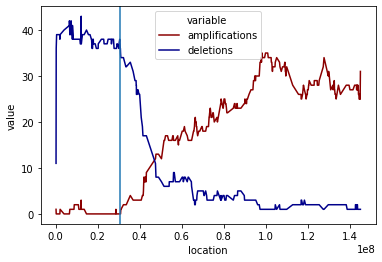

In [19]:
sns.lineplot(x="location", y="value", hue="variable", palette=['darkred', 'darkblue'], data=luad_counts_8)
plt.axvline(deletion_event)

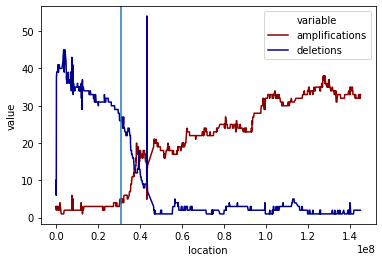

In [20]:
sns.lineplot(x="location", y="value", hue="variable", palette=['darkred', 'darkblue'], data=hnscc_counts_8)
plt.axvline(deletion_event)

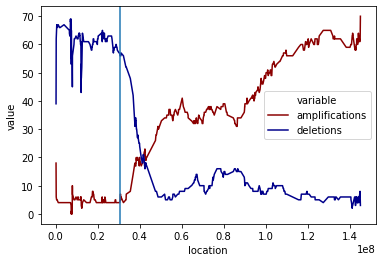

In [21]:
sns.lineplot(x="location", y="value", hue="variable", palette=['darkred', 'darkblue'], data=ovarian_counts_8)
plt.axvline(deletion_event)

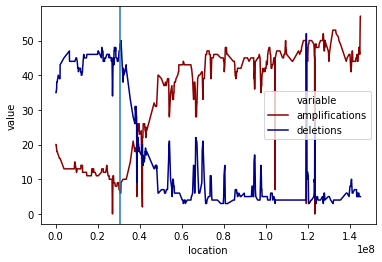

In [22]:
sns.lineplot(x="location", y="value", hue="variable", palette=['darkred', 'darkblue'], data=colon_counts_8)
plt.axvline(deletion_event)

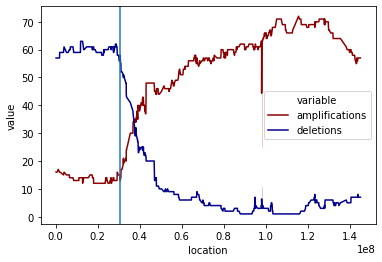

In [23]:
sns.lineplot(x="location", y="value", hue="variable", palette=['darkred', 'darkblue'], data=brca_counts_8)
plt.axvline(deletion_event)

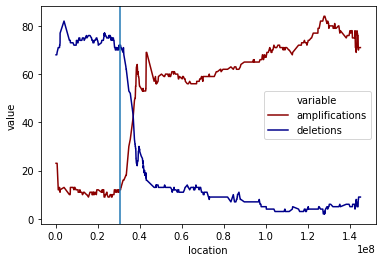

In [24]:
sns.lineplot(x="location", y="value", hue="variable", palette=['darkred', 'darkblue'], data=lscc_counts_8)
plt.axvline(deletion_event)

## Get Genes of Event

In [25]:
def calc_percent(row):
    values = list(row)
    return(len([x for x in values if x <= -0.2]) / len(values))

In [26]:
luad_gene_list = list(luad_counts_cleaned_8[luad_counts_cleaned_8.location < deletion_event].index)
hnscc_gene_list = list(hnscc_counts_cleaned_8[hnscc_counts_cleaned_8.location < deletion_event].index)
ovarian_gene_list = list(ovarian_counts_cleaned_8[ovarian_counts_cleaned_8.location < deletion_event].index)
colon_gene_list = list(colon_counts_cleaned_8[colon_counts_cleaned_8.location < deletion_event].index)
brca_gene_list = list(brca_counts_cleaned_8[brca_counts_cleaned_8.location < deletion_event].index)
lscc_gene_list = list(lscc_counts_cleaned_8[lscc_counts_cleaned_8.location < deletion_event].index)

In [27]:
len(list(luad_gene_list))

186

In [28]:
luad_df_before_event = luad_cnv[luad_gene_list]
hnscc_df_before_event = hnscc_cnv[hnscc_gene_list]
ovarian_df_before_event = ovarian_cnv[ovarian_gene_list]
colon_df_before_event = colon_cnv[colon_gene_list]
brca_df_before_event = brca_cnv[brca_gene_list]
lscc_df_before_event = lscc_cnv[lscc_gene_list]

In [29]:
luad_df_before_event['percent'] = luad_df_before_event.apply(calc_percent, axis=1)
hnscc_df_before_event['percent'] = hnscc_df_before_event.apply(calc_percent, axis=1)
ovarian_df_before_event['percent'] = ovarian_df_before_event.apply(calc_percent, axis=1)
colon_df_before_event['percent'] = colon_df_before_event.apply(calc_percent, axis=1)
brca_df_before_event['percent'] = brca_df_before_event.apply(calc_percent, axis=1)
lscc_df_before_event['percent'] = lscc_df_before_event.apply(calc_percent, axis=1)

C:\Users\chels\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\chels\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\chels\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

## Group Samples

In [30]:
luad_has_event = list(luad_df_before_event[luad_df_before_event.percent > .8].index)
hnscc_has_event = list(hnscc_df_before_event[hnscc_df_before_event.percent > .8].index)
ovarian_has_event = list(ovarian_df_before_event[ovarian_df_before_event.percent > .8].index)
colon_has_event = list(colon_df_before_event[colon_df_before_event.percent > .8].index)
brca_has_event = list(brca_df_before_event[brca_df_before_event.percent > .8].index)
lscc_has_event = list(lscc_df_before_event[lscc_df_before_event.percent > .8].index)

In [31]:
luad_no_event = [x for x in luad_df_before_event.index if x not in luad_has_event]
hnscc_no_event = [x for x in hnscc_df_before_event.index if x not in hnscc_has_event]
ovarian_no_event = [x for x in ovarian_df_before_event.index if x not in ovarian_has_event]
colon_no_event = [x for x in colon_df_before_event.index if x not in colon_has_event]
brca_no_event = [x for x in brca_df_before_event.index if x not in brca_has_event]
lscc_no_event = [x for x in lscc_df_before_event.index if x not in lscc_has_event]

In [32]:
gene_lists = {'LUAD': {'has_event': luad_has_event, 'no_event': luad_no_event},
             'HNSCC': {'has_event': hnscc_has_event, 'no_event': hnscc_no_event},
             'OVARIAN': {'has_event': ovarian_has_event, 'no_event': ovarian_no_event},
             'COLON': {'has_event': colon_has_event, 'no_event': colon_no_event},
             'BRCA': {'has_event': brca_has_event, 'no_event': brca_no_event},
             'LSCC': {'has_event': lscc_has_event, 'no_event': lscc_no_event}}

In [33]:
print("LUAD")
print("Yes", len(luad_has_event), "No", len(luad_no_event))
print("HNSCC")
print("Yes", len(hnscc_has_event), "No", len(hnscc_no_event))
print("OVARIAN")
print("Yes", len(ovarian_has_event), "No", len(ovarian_no_event))
print("COLON")
print("Yes", len(colon_has_event), "No", len(colon_no_event))
print("BRCA")
print("Yes", len(brca_has_event), "No", len(brca_no_event))
print("LSCC")
print("Yes", len(lscc_has_event), "No", len(lscc_no_event))

LUAD
Yes 34 No 75
HNSCC
Yes 30 No 79
OVARIAN
Yes 51 No 49
COLON
Yes 41 No 64
BRCA
Yes 57 No 65
LSCC
Yes 70 No 38


## Run T Tests

In [34]:
def t_test(col, cancer):
    has_ev = col[col.index.isin(gene_lists[cancer]['has_event'])]
    no_ev = col[col.index.isin(gene_lists[cancer]['no_event'])]
    return stats.ttest_ind(has_ev, no_ev)

In [35]:
luad_t_test = luad_mrna.apply(lambda x: t_test(x, "LUAD")).transpose()
hnscc_t_test = hnscc_mrna.apply(lambda x: t_test(x, "HNSCC")).transpose()
ovarian_t_test = ovarian_mrna.apply(lambda x: t_test(x, "OVARIAN")).transpose()
colon_t_test = colon_mrna.apply(lambda x: t_test(x, "COLON")).transpose()
brca_t_test = brca_mrna.apply(lambda x: t_test(x, "BRCA")).transpose()
lscc_t_test = lscc_mrna.apply(lambda x: t_test(x, "LSCC")).transpose()

C:\Users\chels\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\chels\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\chels\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [36]:
lscc_t_test

Name
A1BG                                        (nan, nan)
A1BG-AS1      (-0.351355698847417, 0.7260189383642932)
A1CF                                        (nan, nan)
A2M           (1.677533016887042, 0.09638468879133257)
A2M-AS1      (0.42922420917622317, 0.6686312058083163)
                               ...                    
ZYG11A       (1.2779340095810894, 0.20406418519231448)
ZYG11B      (-0.26374231006919385, 0.7924905364978423)
ZYX           (0.3349184407462194, 0.7383484643404112)
ZZEF1       (-1.4563328121893235, 0.14825633418594125)
ZZZ3        (-0.31250501372362965, 0.7552707046386884)
Length: 21792, dtype: object

In [37]:
hnscc_t_test = hnscc_t_test.to_frame()
hnscc_t_test['hnscc_stat'] = [x[0] for x in hnscc_t_test[0]]
hnscc_t_test['hnscc_pvalue'] = [x[1] for x in hnscc_t_test[0]]

In [38]:
colon_t_test = colon_t_test.to_frame()
colon_t_test['colon_stat'] = [x[0] for x in colon_t_test[0]]
colon_t_test['colon_pvalue'] = [x[1] for x in colon_t_test[0]]

In [39]:
luad_t_test = luad_t_test.to_frame()
luad_t_test['luad_stat'] = [x[0] for x in luad_t_test[0]]
luad_t_test['luad_pvalue'] = [x[1] for x in luad_t_test[0]]

In [40]:
ovarian_t_test = ovarian_t_test.to_frame()
ovarian_t_test['ovarian_stat'] = [x[0] for x in ovarian_t_test[0]]
ovarian_t_test['ovarian_pvalue'] = [x[1] for x in ovarian_t_test[0]]

In [41]:
brca_t_test = brca_t_test.to_frame()
brca_t_test['brca_stat'] = [x[0] for x in brca_t_test[0]]
brca_t_test['brca_pvalue'] = [x[1] for x in brca_t_test[0]]

In [42]:
lscc_t_test = lscc_t_test.to_frame()
lscc_t_test['lscc_stat'] = [x[0] for x in lscc_t_test[0]]
lscc_t_test['lscc_pvalue'] = [x[1] for x in lscc_t_test[0]]

In [43]:
# luad_t_test = luad_t_test.rename(columns={0:"luad_stat", 1:"luad_pvalue"})
# ovarian_t_test = ovarian_t_test.rename(columns={0:"ovarian_stat", 1:"ovarian_pvalue"})
# brca_t_test = brca_t_test.rename(columns={0:"brca_stat", 1:"brca_pvalue"})
# lscc_t_test = lscc_t_test.rename(columns={0:"lscc_stat", 1:"lscc_pvalue"})

In [44]:
colon_t_test = colon_t_test.drop([0], axis=1)
hnscc_t_test = hnscc_t_test.drop([0], axis=1)
brca_t_test = brca_t_test.drop([0], axis=1)
lscc_t_test = lscc_t_test.drop([0], axis=1)
ovarian_t_test = ovarian_t_test.drop([0], axis=1)
luad_t_test = luad_t_test.drop([0], axis=1)

In [45]:
# # Rename the database_id in the tables with multiindex
# luad_t_test.index = luad_t_test.index.rename("Database_ID_Luad", level=1)
# ovarian_t_test.index = ovarian_t_test.index.rename("Database_ID_Ovarian", level=1)
# brca_t_test.index = brca_t_test.index.rename("Database_ID_Brca", level=1)
# lscc_t_test.index = lscc_t_test.index.rename("Database_ID_Lscc", level=1)

In [46]:
luad_t_test

,luad_stat,luad_pvalue
Name,,
A1BG,2.418173,0.017288
A1CF,-1.189443,0.236898
A2M,-0.827077,0.410034
A2ML1,-0.323652,0.746833
A3GALT2,NaN,NaN
...,...,...
ZYG11A,2.262158,0.025708
ZYG11B,3.929396,0.000151
ZYX,-0.514129,0.608222


In [47]:
results = colon_t_test.join(brca_t_test).join(luad_t_test).join(hnscc_t_test).join(ovarian_t_test).join(lscc_t_test)

In [48]:
results_with_loc = add_chromo_and_loc(results)

In [49]:
def outside_event(x):
    a = x['chromo'] != '8'
    b = x['location'] > deletion_event
    return a|b

In [50]:
results_trans = results_with_loc[results_with_loc.apply(lambda x: outside_event(x), axis=1)]

In [51]:
luad_trans_proteins = list(set(results_trans[results_trans.luad_pvalue <= 0.05].index.get_level_values(0)))
ovarian_trans_proteins = list(set(results_trans[results_trans.ovarian_pvalue <= 0.05].index.get_level_values(0)))
hnscc_trans_proteins = list(set(results_trans[results_trans.hnscc_pvalue <= 0.05].index.get_level_values(0)))
colon_trans_proteins = list(set(results_trans[results_trans.colon_pvalue <= 0.05].index.get_level_values(0)))
brca_trans_proteins = list(set(results_trans[results_trans.brca_pvalue <= 0.05].index.get_level_values(0)))
lscc_trans_proteins = list(set(results_trans[results_trans.lscc_pvalue <= 0.05].index.get_level_values(0)))

In [52]:
luad_proteins = list(set(luad_t_test[luad_t_test.luad_pvalue < 0.05].index.get_level_values(0)))
hnscc_proteins = list(set(hnscc_t_test[hnscc_t_test.hnscc_pvalue < 0.05].index.get_level_values(0)))
ovarian_proteins = list(set(ovarian_t_test[ovarian_t_test.ovarian_pvalue < 0.05].index.get_level_values(0)))
colon_proteins = list(set(colon_t_test[colon_t_test.colon_pvalue < 0.05].index.get_level_values(0)))
brca_proteins = list(set(brca_t_test[brca_t_test.brca_pvalue < 0.05].index.get_level_values(0)))
lscc_proteins = list(set(lscc_t_test[lscc_t_test.lscc_pvalue < 0.05].index.get_level_values(0)))

In [53]:
aliases = ['MYC', 'CMYC', 'MYCC', "MRTL", 'BHLHE39']

In [54]:
luad_prot[luad_prot.columns[luad_prot.columns.get_level_values(0).str.startswith('MYC')]].columns.get_level_values(0)

NameError: name 'luad_prot' is not defined

In [60]:
def CountFrequency(my_list): 
  """
  Counts the frequency of the gene in the given list.
  Returns a list of genes that appeared 3 or more times.
  """
  freq = {} 
  for items in my_list: 
      freq[items] = my_list.count(items) 
  sig = []
  for key, value in freq.items(): 
    if value > 5:
        print(key, value)
        sig.append(key)
  return sig

In [61]:
common_proteins = CountFrequency(luad_proteins +
                                hnscc_proteins +
                                ovarian_proteins +
                                colon_proteins +
                                brca_proteins +
                                lscc_proteins)

DCTN6 6
WRN 6
MFHAS1 6
EXTL3 6
VPS37A 6
TNKS 6
MSRA 6
HMBOX1 6
BNIP3L 6
TNFRSF10B 6
ERICH1 6
FUT10 6
PCM1 6
PINX1 6
CCAR2 6
GNRH1 6
AGPAT5 6
LEPROTL1 6
INTS10 6
BIN3 6
FAM160B2 6
TRIM35 6
INTS9 6
MTUS1 6
XPO7 6
KCTD9 6
FBXO25 6
MTMR9 6
ESCO2 6
PPP2CB 6
DOCK5 6
CLN8 6
FZD3 6
CCDC25 6
ERI1 6
CNOT7 6
ELP3 6
POLR3D 6
GTF2E2 6
PPP2R2A 6
LONRF1 6


In [57]:
common_trans_proteins = CountFrequency(luad_trans_proteins +
                                hnscc_trans_proteins +
                                ovarian_trans_proteins +
                                colon_trans_proteins +
                                brca_trans_proteins +
                                lscc_trans_proteins)

WRN 6
FUT10 6
MAK16 5
UBR5 5


In [62]:
print(common_trans_proteins)

['WRN', 'FUT10', 'MAK16', 'UBR5']


In [59]:
lscc_t_test[lscc_t_test.lscc_pvalue < 0.0000000005]

,lscc_stat,lscc_pvalue
Name,,
CCAR2,-7.548883,1.609025e-11
CNOT7,-7.614278,1.160483e-11
KCTD9,-8.221667,5.402654e-13
MCPH1,-6.927254,3.447831e-10
PPP2R2A,-7.987196,1.776378e-12
TNKS,-8.632623,6.605872e-14
VPS37A,-8.294448,3.728596e-13
XPO7,-8.386921,2.325568e-13


In [63]:
def all_low_pvalues(row):
    return ((row['luad_pvalue'] < 0.1) & (row['ovarian_pvalue'] < 0.1) & (row['hnscc_pvalue'] < 0.1) & (row['colon_pvalue'] < 0.1) & (row['brca_pvalue'] < 0.1) & (row['lscc_pvalue'] < 0.1))

In [64]:
common_low_pvalues = results[results.apply(lambda x: all_low_pvalues(x), axis=1)]

In [70]:
common_low_pvalues_trans = results_trans[results_trans.apply(lambda x: all_low_pvalues(x), axis=1)]

In [71]:
common_low_pvalues_trans

,colon_stat,colon_pvalue,brca_stat,brca_pvalue,luad_stat,luad_pvalue,hnscc_stat,hnscc_pvalue,ovarian_stat,ovarian_pvalue,lscc_stat,lscc_pvalue,chromo,location
Name,,,,,,,,,,,,,,
FUT10,-6.153401,1.468927e-08,-2.414464,0.017268,-3.676453,0.000372,-2.546854,0.012320,-4.397838,2.779514e-05,-4.182389,5.960186e-05,8,33421985.0
MAK16,-4.933955,3.107880e-06,-3.475751,0.000710,-4.836590,0.000004,-1.947713,0.054119,-5.931521,4.518634e-08,-3.329330,1.198167e-03,8,33493222.0
WRN,-7.411621,3.599425e-11,-3.422805,0.000848,-5.171049,0.000001,-3.962207,0.000136,-4.806902,5.533885e-06,-5.822394,6.267739e-08,8,31104963.0


In [65]:
common_low_pvalues

,colon_stat,colon_pvalue,brca_stat,brca_pvalue,luad_stat,luad_pvalue,hnscc_stat,hnscc_pvalue,ovarian_stat,ovarian_pvalue,lscc_stat,lscc_pvalue,chromo,location
Name,,,,,,,,,,,,,,
AGPAT5,-7.421649,3.426215e-11,-5.086747,1.360894e-06,-4.589340,1.215923e-05,-3.912646,1.623278e-04,-4.370361,3.088570e-05,-5.093940,1.534995e-06,8,6735072.5
ARHGEF10,-2.829757,5.600982e-03,-5.077841,1.414415e-06,-3.463167,7.687597e-04,-2.040768,4.378276e-02,-1.866983,6.489328e-02,-1.994024,4.871758e-02,8,1891283.5
ATP6V1B2,-8.413277,2.423213e-13,-5.593413,1.425083e-07,-4.456100,2.062246e-05,-7.425928,3.090071e-11,-3.858517,2.043732e-04,-1.937353,5.536339e-02,8,20212100.0
BIN3,-8.580938,1.037146e-13,-6.183477,8.953238e-09,-8.680708,4.848687e-14,-5.772889,7.986232e-08,-5.013945,2.372807e-06,-6.000469,2.780428e-08,8,22644783.0
BNIP3L,-6.301868,7.383227e-09,-5.659561,1.052401e-07,-5.448483,3.275459e-07,-3.908093,1.650189e-04,-5.761850,9.618658e-08,-5.086001,1.587483e-06,8,26444345.0
CCAR2,-5.748205,9.261553e-08,-7.308528,3.275152e-11,-9.446443,9.144400e-16,-5.884926,4.810419e-08,-2.798765,6.177863e-03,-7.548883,1.609025e-11,8,22613073.0
CCDC25,-6.276978,8.289581e-09,-6.829846,3.734771e-10,-6.488842,2.763099e-09,-7.140984,1.257291e-10,-4.797234,5.754367e-06,-5.046405,1.876547e-06,8,27752984.5
CDCA2,-6.855606,5.374526e-10,-1.962882,5.197365e-02,-2.515933,1.335681e-02,-3.484014,7.217259e-04,-3.800337,2.509835e-04,-5.875432,4.925836e-08,8,25483555.0
CLN8,-6.227527,1.042802e-08,-3.139008,2.133966e-03,-6.008595,2.624013e-08,-5.635715,1.476347e-07,-2.058347,4.221075e-02,-4.213248,5.303570e-05,8,1778744.5


In [66]:
common_low_pvalues_cleaned = common_low_pvalues.drop(columns=['chromo', 'location'])

In [67]:
common_low_pvalues_cleaned.index = common_low_pvalues_cleaned.index.droplevel([1,2,3,4])

IndexError: Too many levels: Index has only 1 level, not 2

In [68]:
common_low_pvalues_cleaned.to_csv("mrna_t_test_p_arm.csv")

In [69]:
list(common_low_pvalues_cleaned.index)

['AGPAT5',
 'ARHGEF10',
 'ATP6V1B2',
 'BIN3',
 'BNIP3L',
 'CCAR2',
 'CCDC25',
 'CDCA2',
 'CLN8',
 'CNOT7',
 'DCTN6',
 'DMTN',
 'DOCK5',
 'ELP3',
 'ERI1',
 'ERICH1',
 'ESCO2',
 'EXTL3',
 'FAM160B2',
 'FBXO25',
 'FUT10',
 'FZD3',
 'GNRH1',
 'GTF2E2',
 'HMBOX1',
 'INTS10',
 'INTS9',
 'KCTD9',
 'KIF13B',
 'LEPROTL1',
 'LONRF1',
 'MAK16',
 'MFHAS1',
 'MSRA',
 'MTMR9',
 'MTUS1',
 'PBK',
 'PCM1',
 'PINX1',
 'POLR3D',
 'PPP2CB',
 'PPP2R2A',
 'PSD3',
 'TNFRSF10B',
 'TNKS',
 'TRIM35',
 'VPS37A',
 'WRN',
 'XPO7',
 'ZDHHC2',
 'ZNF395']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six

In [ ]:
!pip install scinot

In [ ]:
import scinot

In [ ]:
scinot.start(sigfigs=1, thresh=2)

In [ ]:
common_low_pvalues_cleaned = common_low_pvalues_cleaned.applymap(lambda x: scinot.format(x, 3) )

In [ ]:
common_low_pvalues_cleaned.reset_index(inplace=True)

In [ ]:

def render_mpl_table(data, col_width=2.2, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

In [ ]:
render_mpl_table(common_low_pvalues_cleaned)